In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [28]:
kesifsel veri analizi 2 : cok degiskenli analiz calis degisken secmek icin
    
kategorik degiskenlerle calismaya 
    
korelasyonlari tek tek olcup en yuksek korele oranli olanlari al

count.plt

kaggle takipcisi kas

blog yazisi yaz

cod'larda yazdigin seylere gelebilecek sorulara cevaplar verebilecek ol.

.corr()

veri.apply(fonksiyon adi)

SyntaxError: invalid syntax (<ipython-input-28-54bbd99376d9>, line 1)

In [68]:
house_info = pd.read_csv('/Users/samilyildiz/Desktop/train.csv')
house_info

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [71]:


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

hinfo = house_info.select_dtypes(include=numerics)
hinfo

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [74]:
hinfocor = hinfo.corr()
hinfocor


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Text(0.5, 1, 'Korelasyon Matrisi (House Info)')

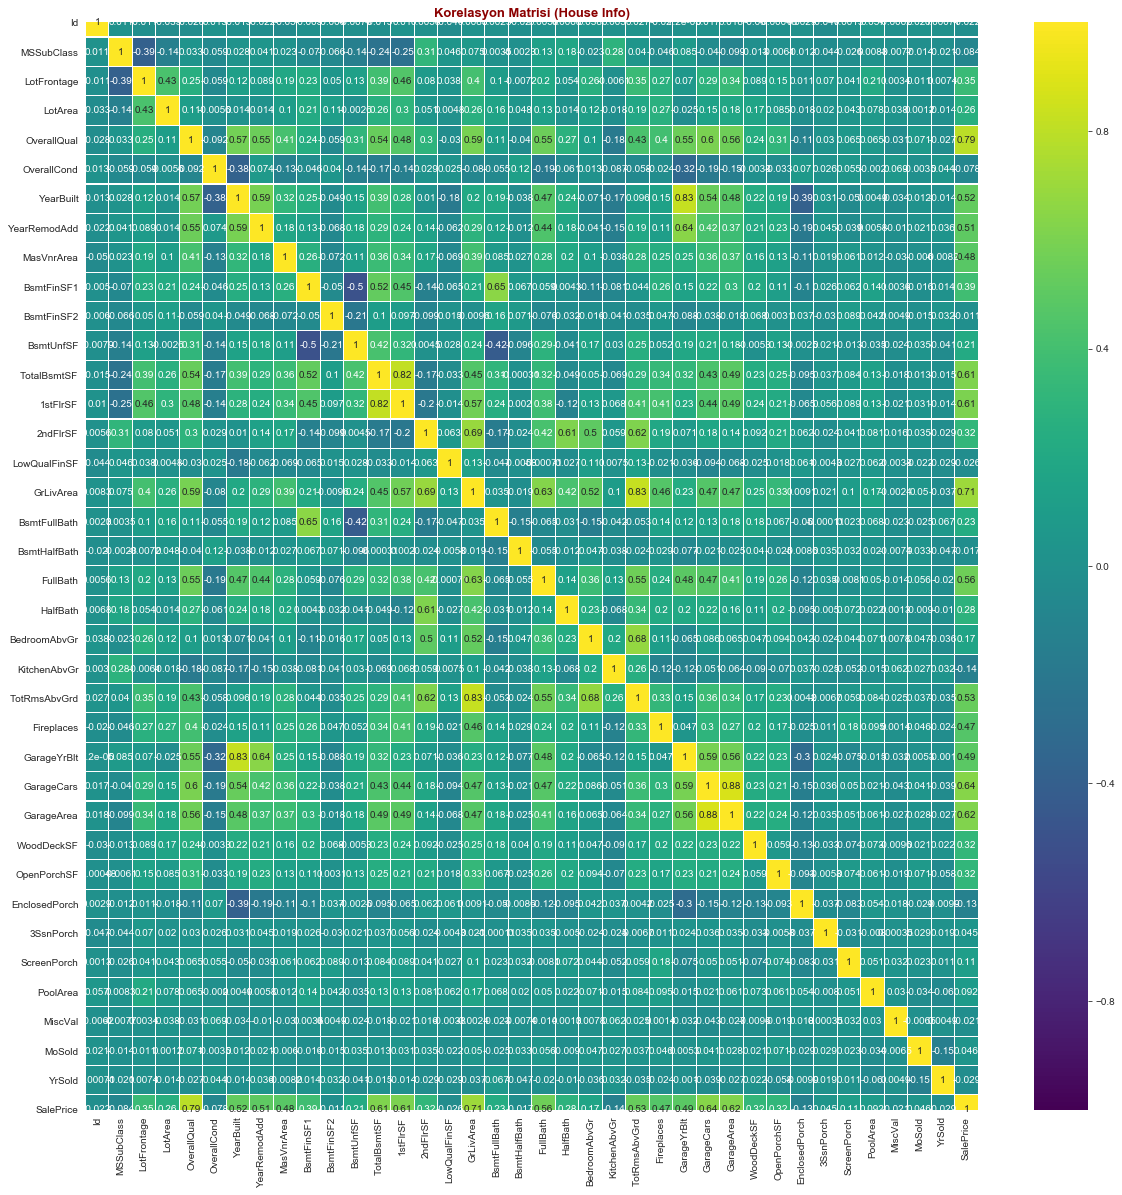

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(hinfocor, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (House Info)", fontdict = baslik_font)

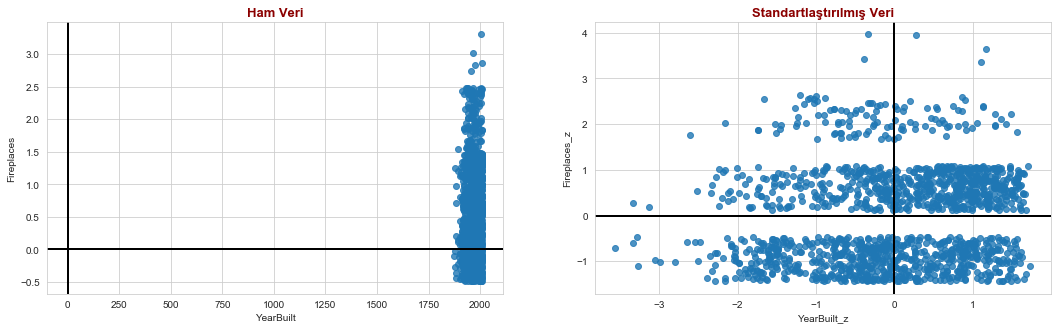

In [32]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('YearBuilt', 'Fireplaces', house_info, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

plt.subplot(1,2,2)

house_info_st = pd.DataFrame()
house_info_st['YearBuilt_z'] = (house_info['YearBuilt'] - house_info['YearBuilt'].mean()) / house_info['YearBuilt'].std()
house_info_st['Fireplaces_z'] = (house_info['Fireplaces'] - house_info['Fireplaces'].mean()) / house_info['Fireplaces'].std()

t = sns.regplot('YearBuilt_z','Fireplaces_z',house_info_st, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

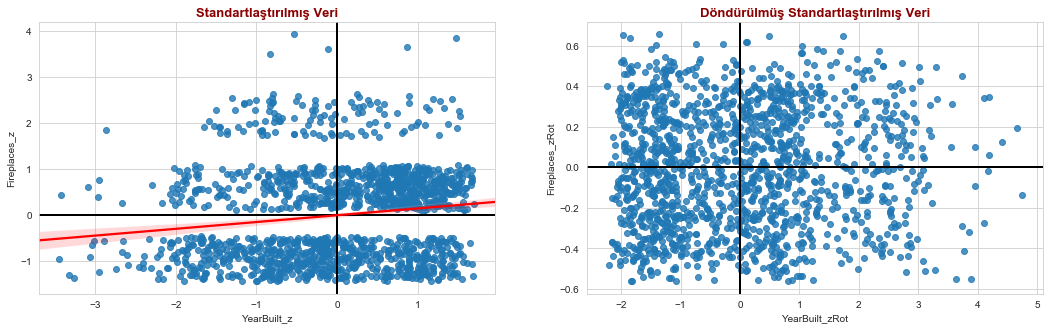

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('YearBuilt_z', 'Fireplaces_z', house_info_st, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

sns.regplot('YearBuilt_z', 'Fireplaces_z', house_info_st, scatter=False, color="red")

plt.subplot(1,2,2)

house_info_st['YearBuilt_zRot'] = math.cos(40) * house_info_st['YearBuilt_z'] - math.sin(40) * house_info_st['YearBuilt_z']
house_info_st['Fireplaces_zRot'] = math.sin(40) * house_info_st['Fireplaces_z'] + math.cos(40) * house_info_st['Fireplaces_z']

t = sns.regplot('YearBuilt_zRot','Fireplaces_zRot', house_info_st, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Döndürülmüş Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

In [78]:
hinfo= hinfo.dropna()
X = StandardScaler().fit_transform(hinfo)

Xt = X.T
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

Kovaryans matrisi :
 [[ 1.00089286e+00  2.19570656e-02 -1.33004348e-02 ... -5.70377412e-04
   1.34186136e-02 -4.71639232e-02]
 [ 2.19570656e-02  1.00089286e+00 -3.87285055e-01 ... -2.71946418e-02
  -1.24589432e-02 -8.81103022e-02]
 [-1.33004348e-02 -3.87285055e-01  1.00089286e+00 ...  1.88313334e-02
   1.32789166e-02  3.44577156e-01]
 ...
 [-5.70377412e-04 -2.71946418e-02  1.88313334e-02 ...  1.00089286e+00
  -1.50711056e-01  5.16141066e-02]
 [ 1.34186136e-02 -1.24589432e-02  1.32789166e-02 ... -1.50711056e-01
   1.00089286e+00 -1.18794205e-02]
 [-4.71639232e-02 -8.81103022e-02  3.44577156e-01 ...  5.16141066e-02
  -1.18794205e-02  1.00089286e+00]]


In [82]:
sklearn_pca = PCA(n_components=38)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()

NameError: name 'eig_vec_cov' is not defined

In [ ]:
P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()